In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [10]:
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)

(10000, 3072) (1000, 3072)


**CALCULATING THE L2 DISTANCE**

In [11]:
class KNearest(object):
    def __init__(value):
        pass # Used to excute nothing
    def train(value, X, Y):
        value.X_train = X
        value.y_train = Y
    def predict(value, X, k=1, num_of_loops=0):
        if num_of_loops == 0:
            distance = value.compute_distances(X)
        else:
            raise ValueError('Invalid value %d for num_loops' % num_of_loops)
        return value.predict_labels(distance, k=k)

    #FOR CALCULATING THE DISTANCE
    def compute_distances(value, X):
        num_of_test = X.shape[0]
        num_of_train = value.X_train.shape[0]
        distance = np.zeros((num_of_test, num_of_train)) 
        distance = np.sqrt(np.sum(np.square(value.X_train), axis=1) + np.sum(np.square(X), axis=1)[:, np.newaxis] - 2 * np.dot(X, value.X_train.T))
        pass
        return distance
    #FOR PREDICTION
    def predict_labels(value, distance, k=1):
        num_of_test = distance.shape[0]
        y_predict = np.zeros(num_of_test)
        for i in range(num_of_test):
            closest_y = []
            sorted_dist = np.argsort(distance[i]) # Used for indirect sort along the given axis
            closest_y = list(value.y_train[sorted_dist[0:k]])
            pass
            y_predict[i]= (np.argmax(np.bincount(closest_y)))  #np.argmax returns indices of the max element of the array 
                                                               #np.bincount get the frequency of element inside a numpy array
            pass
        return y_predict

**IMPORTING KERAS DATASET**

In [12]:
(X_train, Y_train),(X_test, Y_test) =tf.keras.datasets.cifar10.load_data()

In [4]:
print(X_train.shape) #return total_images, image_dimension, 3 color
print(Y_train.shape)

(50000, 32, 32, 3)
(50000, 1)


**CIFAR-10 ALL CLASSES**

In [14]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print( len(class_names))

10


**VISUALIZING ALL THE CLASSES**

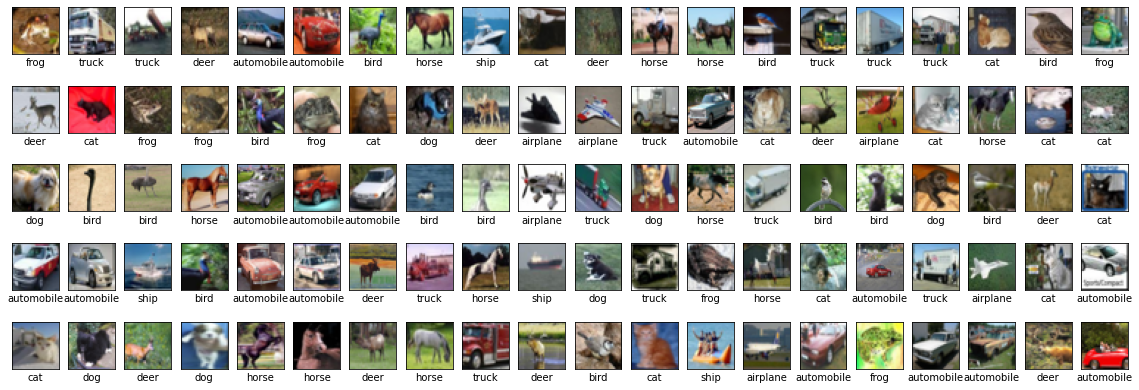

In [13]:
i=0
plt.figure(figsize=(20,7))

for i in range(100):  
  plt.subplot(5,20,i+1) #row, column, and index
  plt.imshow(X_train[i])
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(class_names[Y_train[i][0]])
plt.show()

**DATA SAMPLING**

In [15]:
no_of_training = 10000
input = list(range(no_of_training))
X_train = X_train[input]
Y_train = Y_train[input]

no_of_test = 1000
input = list(range(no_of_test))
X_test = X_test[input]
Y_test = Y_test[input]

**RESHAPING THE TRAINING DATA**

In [8]:
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)

(10000, 3072) (1000, 3072)


**K-NN**

In [16]:
indentifer = KNearest()
indentifer.train(X_train, Y_train)
distance= indentifer.compute_distances(X_test)
y_test_predict = indentifer.predict_labels(distance, k=5)
no_correct_predict = np.sum(y_test_predict == Y_test)
accuracy = float(no_correct_predict) / num_of_test
print('Got %d / %d correct => accuracy: %f' % (no_correct_predict, num_of_test, accuracy))

ValueError: ignored

**VALIDATION**

In [19]:
folds = 5
choices = [1, 3, 5, 8 ,10, 12, 15, 20, 50, 100]

X_train_folds = []
Y_train_folds = []

X_train_folds = np.array_split(X_train,folds)
Y_train_folds = np.array_split(Y_train,folds)
k_accuracies = {}


for k in choices:
    k_accuracies[k] = []
    for no_KNear in range(0,folds):
        X_test = X_train_folds[no_KNear]
        Y_test = Y_train_folds[no_KNear]
        X_train = X_train_folds
        Y_train = Y_train_folds
        
        temp = np.delete(X_train,no_KNear,0)
        X_train = np.concatenate((temp),axis = 0)
        Y_train = np.delete(Y_train,no_KNear,0)
        Y_train = np.concatenate((Y_train),axis = 0)
        
        indentifer = KNearest()
        indentifer.train(X_train, Y_train)
        distance = indentifer.compute_distances(X_test)
        y_test_predict = indentifer.predict_labels(distance, k)

        no_of_correct = np.sum(y_test_predict == Y_test)
        accuracy = float(no_of_correct) / no_Of_test
        k_accuracies[k].append(accuracy)


print(" 5-fold accuracies for varying values of k:")
print()
for k in sorted(k_accuracies):
    for accuracy in k_accuracies[k]:
        print('k = %d, accuracy = %f' % (k, accuracy))

ValueError: ignored

KeyError: ignored

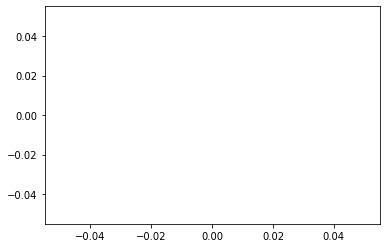

In [20]:
for k in choices:
    accuracies = k_accuracies[k]
    plt.scatter([k] * len(accuracies), accuracies)


accuracies_mean = np.array([np.mean(v) for k,v in sorted(k_accuracies.items())])
accuracies_std = np.array([np.std(v) for k,v in sorted(k_accuracies.items())])
plt.errorbar(choices, accuracies_mean, yerr=accuracies_std)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')
plt.show()